In [61]:
import numpy as np
np.set_printoptions(precision=4)
from pathlib import Path
import mujoco
import matplotlib.pyplot as plt
import logging

In [62]:
contact_data_dir = "26032024-114112" # Transposed contact frame

## Load a particular run

In [63]:
axis = "x"
angle = "-30"
cloth = "25"
file_path = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}.npy"
scene_xml = Path("xmls") / f"{cloth}_scene.xml"

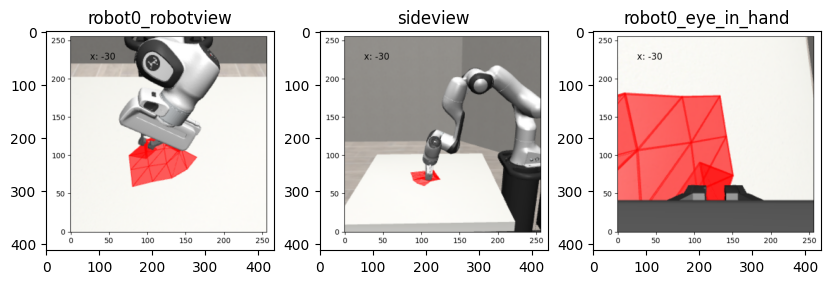

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, camera in zip(axs, ['robot0_robotview', 'sideview', 'robot0_eye_in_hand']):
    contact_image = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}_{camera}.png"
    ax.imshow(plt.imread(contact_image))
    ax.set_title(camera)
plt.show()

## Get contact points

In [65]:
contacts = np.load(file_path,allow_pickle='TRUE').item()

In [66]:
model = mujoco.MjModel.from_xml_path(str(scene_xml.resolve()))

name == plugin section


In [67]:
left_finger_id = model.geom('gripper0_finger1_collision').id
right_finger_id = model.geom('gripper0_finger2_collision').id

In [68]:
left_finger_mask = ((contacts['geom'][:, 0] == left_finger_id) | (
            contacts['geom'][:, 1] == left_finger_id))
left_contact_points = np.nonzero(left_finger_mask)

In [69]:
right_finger_mask = ((contacts['geom'][:, 0] == right_finger_id) | (
            contacts['geom'][:, 1] == right_finger_id))
right_contact_points = np.nonzero(right_finger_mask)

In [70]:
left_contact_coordinates = contacts['pos'][left_contact_points]

In [71]:
right_contact_coordinates = contacts['pos'][right_contact_points]

In [72]:
all_coordinates = np.concatenate((left_contact_coordinates, right_contact_coordinates))

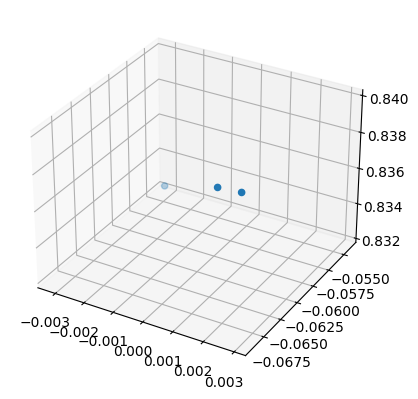

In [73]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_coordinates[:, 0], all_coordinates[:, 1], all_coordinates[:, 2])
plt.show()

## How many contact points exist?

In [74]:
len(all_coordinates)

3

## Rank of the wrench vector space

In [75]:
contact_wrenches = contacts['forces']

In [76]:
contact_wrenches.shape

(6, 3)

In [77]:
np.linalg.matrix_rank(contact_wrenches)

3

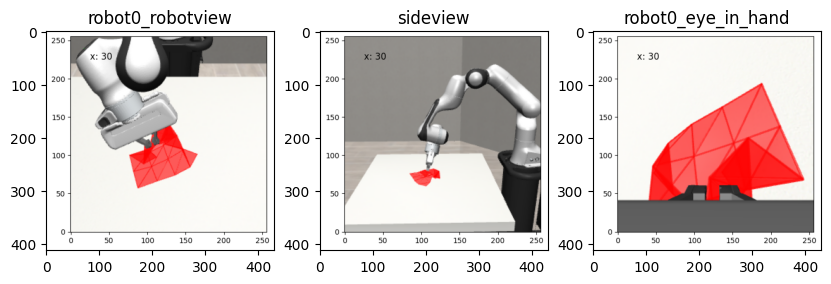

In [85]:
axis = "x"
angle = "30"
cloth = "25"
file_path = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}.npy"
scene_xml = Path("xmls") / f"{cloth}_scene.xml"


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, camera in zip(axs, ['robot0_robotview', 'sideview', 'robot0_eye_in_hand']):
    contact_image = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}_{camera}.png"
    ax.imshow(plt.imread(contact_image))
    ax.set_title(camera)
plt.show()

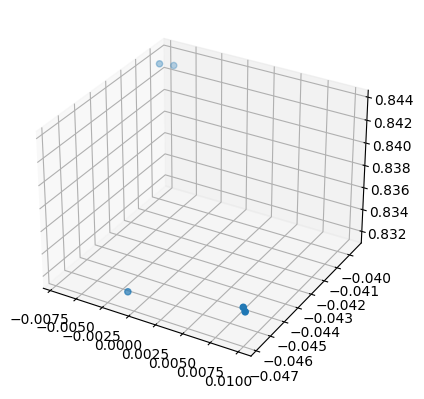

In [86]:
contacts = np.load(file_path,allow_pickle='TRUE').item()
left_finger_id = model.geom('gripper0_finger1_collision').id
right_finger_id = model.geom('gripper0_finger2_collision').id

left_finger_mask = ((contacts['geom'][:, 0] == left_finger_id) | (
            contacts['geom'][:, 1] == left_finger_id))
left_contact_points = np.nonzero(left_finger_mask)

right_finger_mask = ((contacts['geom'][:, 0] == right_finger_id) | (
            contacts['geom'][:, 1] == right_finger_id))
right_contact_points = np.nonzero(right_finger_mask)

left_contact_coordinates = contacts['pos'][left_contact_points]
right_contact_coordinates = contacts['pos'][right_contact_points]

all_coordinates = np.concatenate((left_contact_coordinates, right_contact_coordinates))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_coordinates[:, 0], all_coordinates[:, 1], all_coordinates[:, 2])
plt.show()

In [87]:
ConvexHull(contacts['forces']).volume

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt Qx
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1107378052  incidence  Qtriangulate  Qxact-merge  _zero-centrum
  _max-width 1.5  Error-roundoff 4.2e-15  _one-merge 4.6e-14
  _near-inside 2.3e-13  Visible-distance 2.5e-14  U-max-coplanar 2.5e-14
  Width-outside 5e-14  _wide-facet 1.5e-13  _maxoutside 5e-14

precision problems (corrected unless 'Q0' or an error)
      4 nearly singular or axis-parallel hyperplanes
      4 zero divisors during back substitute
      5 zero divisors during gaussian elimination

The input to qhull appears to be less than 5 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p5(v6):     0     0     0     0     0
- p4(v5):     0     0     0     0     0
- p1(v4):   1.5  0.53     1  0.41 -0.28
- p2(v3):  0.42  0.12 0.037 -0.15 -0.44
- p0(v2):   1.5   1.1   1.1  0.86  0.87
- p3(v1): -2.7e-05 -0.0044 -0.0017 0.0029 0.00078

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 4.2e-15.  The center point, facets and distances
to the center point are as follows:

center point   0.5687    0.283   0.3506   0.1883  0.02439

facet p4 p1 p2 p0 p3 distance= 1.7e-18
facet p5 p1 p2 p0 p3 distance= -1.7e-18
facet p5 p4 p2 p0 p3 distance= -0.06
facet p5 p4 p1 p0 p3 distance= -0.04
facet p5 p4 p1 p2 p3 distance= -0.084
facet p5 p4 p1 p2 p0 distance= -0.00079

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:  -2.744e-05     1.527  difference= 1.527
  1:  -0.004374     1.053  difference= 1.058
  2:  -0.001748     1.064  difference= 1.066
  3:   -0.1461    0.8642  difference= 1.01
  4:   -0.4387    0.8655  difference= 1.304

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 4.2e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


## Volume of the wrench space using SVD

In [78]:
_, S, _ = np.linalg.svd(contact_wrenches)

In [79]:
sig = S
np.sqrt(np.prod(sig))

2.380367885133027

## Convex hull volume of the coordinate space

In [82]:
contacts['forces']

array([[ 1.7799e+00,  1.7564e+00,  1.8035e+00],
       [ 9.5227e-01, -9.7856e-02,  1.4781e+00],
       [ 9.7177e-01, -1.1803e+00, -1.0253e+00],
       [ 4.8145e-03,  3.0228e-03, -6.4055e-04],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [83]:
contacts['forces'].shape

(6, 3)

In [84]:
ConvexHull(contacts['forces']).volume

0.9468209765407961

In [80]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d, QhullError

In [81]:
hull = ConvexHull(all_coordinates)

QhullError: QH6214 qhull input error: not enough points(3) to construct initial simplex (need 4)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1100688866  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


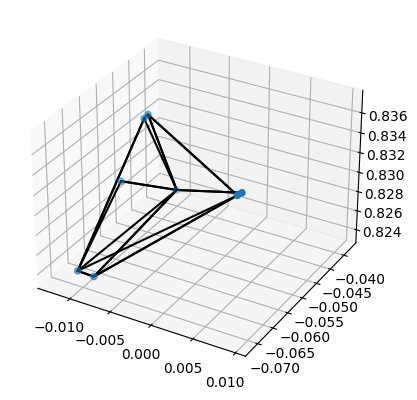

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_coordinates[:, 0], all_coordinates[:, 1], all_coordinates[:, 2])
for simplex in hull.simplices:
    ax.plot(all_coordinates[simplex, 0], all_coordinates[simplex, 1], all_coordinates[simplex, 2], 'k-')
plt.show()

In [24]:
hull.volume * 1e6

1.419969658492328

## Ferrari Canny Epsilon metric

## Wrench volume using convex hull

In [59]:
contacts['forces']

array([[ 5.1710e-01,  5.9317e-01, -9.6580e-01,  9.7576e-01,  1.5176e-01,
        -4.6735e-02, -4.3329e-01,  9.0633e-02],
       [ 1.2263e+00,  9.9586e-01,  1.8406e+00,  2.0236e+00, -2.9495e-01,
         4.8005e-01, -1.0233e+00, -1.1340e+00],
       [-2.5163e-01, -7.3022e-01,  6.9027e-02, -2.5992e-01,  6.4904e-02,
        -5.3422e-01, -9.9296e-03,  8.9330e-01],
       [ 1.7925e-03, -1.1808e-03, -1.6679e-04,  5.8908e-04, -2.9983e-05,
        -9.5449e-05, -2.4762e-03, -8.5245e-04],
       [ 1.4395e-03, -9.4826e-04,  1.5564e-03, -5.4976e-03, -1.0156e-04,
         3.1124e-05, -3.2865e-03, -1.1314e-03],
       [-6.8295e-04,  4.4989e-04, -5.6309e-04,  1.9890e-03, -7.1689e-07,
        -1.0531e-04,  1.0355e-03,  3.5648e-04]])

In [60]:
contacts['forces'].shape

(6, 8)

In [58]:
ConvexHull(contacts['forces']).volume

QhullError: QH6214 qhull input error: not enough points(6) to construct initial simplex (need 9)

While executing:  | qhull i Qt Qx
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1065780727  incidence  Qtriangulate  Qxact-merge  _zero-centrum
  Q3-no-merge-vertices-dim-high  _maxoutside  0


In [25]:
import cvxopt as cvx
def min_norm_vector_in_facet(facet, wrench_regularizer=1e-10):
        dim = facet.shape[1] # num vertices in facet

        # create alpha weights for vertices of facet
        G = facet.T.dot(facet)
        grasp_matrix = G + wrench_regularizer * np.eye(G.shape[0])

        # Solve QP to minimize .5 x'Px + q'x subject to Gx <= h, Ax = b
        P = cvx.matrix(2 * grasp_matrix)   # quadratic cost for Euclidean dist
        q = cvx.matrix(np.zeros((dim, 1)))
        G = cvx.matrix(-np.eye(dim))       # greater than zero constraint
        h = cvx.matrix(np.zeros((dim, 1)))
        A = cvx.matrix(np.ones((1, dim)))  # sum constraint to enforce convex
        b = cvx.matrix(np.ones(1))         # combinations of vertices

        sol = cvx.solvers.qp(P, q, G, h, A, b)
        v = np.array(sol['x'])
        min_norm = np.sqrt(sol['primal objective'])

        return abs(min_norm), v

In [26]:
def ferrari_canny_L1(wrenches, wrench_norm_thresh=1e-2, wrench_regularizer=1e-10):
    G = wrenches

    try:
        hull = ConvexHull(wrenches.T)
    
        if len(hull.simplices) == 0:
            print('Convex hull could not be computed')
            return 0.0, False
    
        # determine whether or not zero is in the convex hull
        min_norm_in_hull, v = min_norm_vector_in_facet(G, wrench_regularizer=wrench_regularizer)
    
        # print(f"min_norm_in_hull: {min_norm_in_hull} -- v:{v}")
        
        # if norm is greater than 0 then forces are outside of hull
        if min_norm_in_hull > wrench_norm_thresh:
            print('Zero not in convex hull')
            return 0.0, False
    
        # if there are fewer nonzeros than D-1 (dim of space minus one)
        # then zero is on the boundary and therefore we do not have
        # force closure
        print("blah")
        print(f"np.sum(v > 1e-4) : {np.sum(v > 1e-4)} G.shape[0]-1: {G.shape[0]-1}")
        if np.sum(v > 1e-4) <= G.shape[0]-1:
            print('Zero not in interior of convex hull')
            return 0.0, False
    
        # find minimum norm vector across all facets of convex hull
        min_dist = sys.float_info.max
        closest_facet = None
        for v in hull.simplices:
            if np.max(np.array(v)) < G.shape[1]: # because of some occasional odd behavior from pyhull
                facet = G[:, v]
                dist, _ = min_norm_vector_in_facet(facet, wrench_regularizer=wrench_regularizer)
                if dist < min_dist:
                    min_dist = dist
                    closest_facet = v
        return min_dist, True
    except QhullError:
        return 0.0, False

In [27]:
min_dist, exists = ferrari_canny_L1(contact_wrenches)

     pcost       dcost       gap    pres   dres
 0:  6.9321e-04 -1.0575e+00  1e+00  2e-16  3e+00
 1:  9.9585e-05 -2.3258e-02  2e-02  4e-17  7e-02
 2:  1.6068e-06 -2.8466e-04  3e-04  7e-17  8e-04
 3:  1.4887e-06 -6.3044e-06  8e-06  7e-17  2e-05
 4:  4.6503e-07 -7.2866e-07  1e-06  6e-17  2e-06
 5:  9.1921e-08 -1.5916e-07  3e-07  2e-16  3e-16
 6:  2.7146e-08 -4.1153e-09  3e-08  1e-16  9e-17
Optimal solution found.
blah
np.sum(v > 1e-4) : 8 G.shape[0]-1: 5
     pcost       dcost       gap    pres   dres
 0:  3.1073e-03 -1.0952e+00  1e+00  2e-16  3e+00
 1:  8.7249e-04 -3.7092e-02  4e-02  1e-16  1e-01
 2:  4.6159e-06 -8.3458e-04  8e-04  8e-17  2e-03
 3:  3.6304e-06 -1.0465e-05  1e-05  1e-16  3e-05
 4:  2.4273e-06 -9.8552e-07  3e-06  2e-16  5e-06
 5:  1.2122e-06  1.3644e-07  1e-06  7e-16  1e-06
 6:  1.0677e-06  9.9675e-07  7e-08  2e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.7565e-03 -1.0872e+00  1e+00  2e-16  3e+00
 1:  4.2661e-03 -4.2661e-02  5e

In [28]:
min_dist * 1e5

13.168465425613611

In [29]:
axis = "x"
angle = "10"
cloth = "25"
file_path = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}.npy"
scene_xml = Path("xmls") / f"{cloth}_scene.xml"

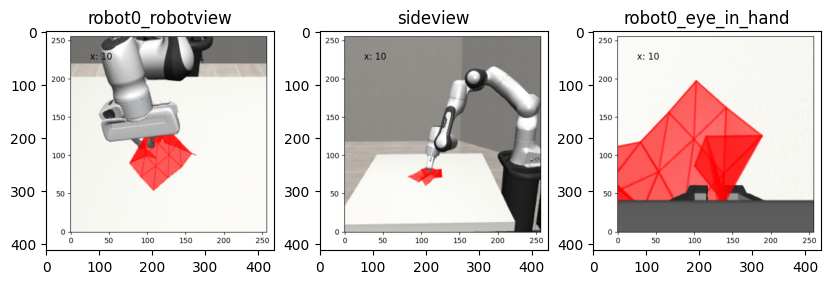

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, camera in zip(axs, ['robot0_robotview', 'sideview', 'robot0_eye_in_hand']):
    contact_image = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}_{camera}.png"
    ax.imshow(plt.imread(contact_image))
    ax.set_title(camera)
plt.show()

In [31]:
contacts = np.load(file_path,allow_pickle='TRUE').item()
left_finger_mask = ((contacts['geom'][:, 0] == left_finger_id) | (
            contacts['geom'][:, 1] == left_finger_id))
left_contact_points = np.nonzero(left_finger_mask)
right_finger_mask = ((contacts['geom'][:, 0] == right_finger_id) | (
            contacts['geom'][:, 1] == right_finger_id))
right_contact_points = np.nonzero(right_finger_mask)
left_contact_coordinates = contacts['pos'][left_contact_points]
right_contact_coordinates = contacts['pos'][right_contact_points]
all_coordinates = np.concatenate((left_contact_coordinates, right_contact_coordinates))

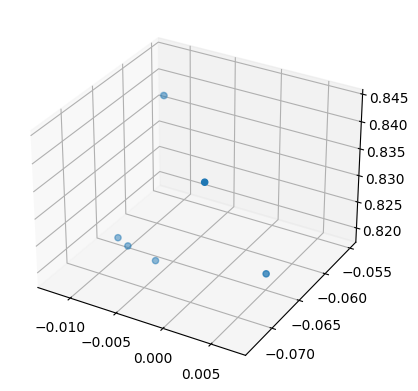

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_coordinates[:, 0], all_coordinates[:, 1], all_coordinates[:, 2])
plt.show()

In [33]:
len(all_coordinates)

7

In [34]:
contact_wrenches = contacts['forces']
contact_wrenches.shape

(6, 7)

In [35]:
np.linalg.matrix_rank(contact_wrenches)

6

In [36]:
_, S, _ = np.linalg.svd(contact_wrenches)
sig = S
np.sqrt(np.prod(sig))

4.674778368946137e-08

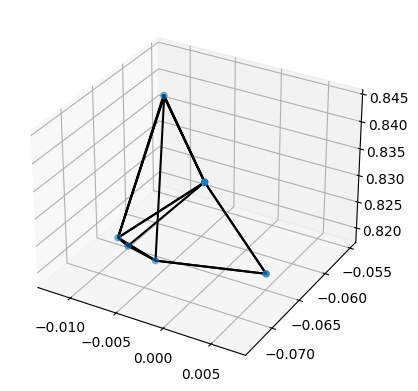

In [37]:
hull = ConvexHull(all_coordinates)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_coordinates[:, 0], all_coordinates[:, 1], all_coordinates[:, 2])
for simplex in hull.simplices:
    ax.plot(all_coordinates[simplex, 0], all_coordinates[simplex, 1], all_coordinates[simplex, 2], 'k-')
plt.show()

In [38]:
hull.volume * 1e6

1.0505812370108836

In [39]:
min_dist, exists = ferrari_canny_L1(contact_wrenches)

     pcost       dcost       gap    pres   dres
 0:  3.5701e-03 -1.0429e+00  1e+00  0e+00  3e+00
 1:  2.3358e-03 -3.1643e-02  3e-02  7e-17  1e-01
 2:  4.8168e-04 -1.9236e-03  2e-03  6e-17  3e-03
 3:  2.0861e-05 -4.0967e-04  4e-04  1e-16  1e-16
 4:  9.1557e-08 -1.7320e-05  2e-05  4e-16  7e-17
 5:  1.0032e-09 -1.7735e-07  2e-07  1e-16  1e-16
 6:  9.6600e-10 -2.2016e-09  3e-09  2e-16  2e-16
Optimal solution found.
blah
np.sum(v > 1e-4) : 7 G.shape[0]-1: 5
     pcost       dcost       gap    pres   dres
 0:  4.7595e-03 -1.0435e+00  1e+00  0e+00  3e+00
 1:  3.4580e-03 -3.0801e-02  3e-02  2e-16  1e-01
 2:  8.5922e-04 -1.9001e-03  3e-03  2e-16  3e-03
 3:  7.7528e-05 -6.9568e-04  8e-04  6e-16  5e-17
 4:  4.1908e-06 -6.2134e-05  7e-05  4e-16  7e-17
 5:  7.1156e-09 -1.6612e-06  2e-06  2e-16  6e-17
 6:  3.2859e-09 -1.4605e-08  2e-08  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6855e-03 -1.0359e+00  1e+00  1e-16  3e+00
 1:  1.7700e-03 -2.7016e-02  3e

In [40]:
min_dist * 1e5

1.927571607107008

## Build dataframe

In [41]:
import pandas as pd
import itertools

In [42]:
def cvx_vol(all_coordinates):
    try:
        hull = ConvexHull(all_coordinates)
        return hull.volume, True    
    except QhullError:
        return 0.0, False

In [43]:
def wrench_dim(wrenches):
    return np.linalg.matrix_rank(wrenches)

In [44]:
def wrench_vol(wrenches):
    _, S, _ = np.linalg.svd(wrenches)
    sig = S
    return np.sqrt(np.prod(sig)) * 1e6

In [45]:
axes = ["x", "y"]
angles = np.arange(-np.pi/6, np.pi/6+np.pi/18, step=np.pi/18)
cloth_names = [25, 50, 100, 200]
column_names = ["cloth", "axis", "angle", "num_points", "points_cvx_vol", 
                "points_cvx_vol_exists", "wrench_dim", "wench_vol", 
                "epsilon", "epsilon_exists"]
data = []
for cloth_name in cloth_names:
    angles = np.rad2deg(np.arange(-np.pi/6, np.pi/6+np.pi/18, step=np.pi/18))
    combinations = itertools.product(['x', 'y'], angles)
    combinations = [(ax, ang) for ax, ang in combinations if ax == 'x' or ang != 0]
    for (axis, angle) in combinations:
        angle = f"{angle:.0f}"
        file_path = Path(contact_data_dir) / f"{cloth}_{axis}_{angle}.npy"
        scene_xml = Path("xmls") / f"{cloth}_scene.xml"

        contacts = np.load(file_path,allow_pickle='TRUE').item()
        left_finger_mask = ((contacts['geom'][:, 0] == left_finger_id) | (
                    contacts['geom'][:, 1] == left_finger_id))
        left_contact_points = np.nonzero(left_finger_mask)
        right_finger_mask = ((contacts['geom'][:, 0] == right_finger_id) | (
                    contacts['geom'][:, 1] == right_finger_id))
        right_contact_points = np.nonzero(right_finger_mask)
        left_contact_coordinates = contacts['pos'][left_contact_points]
        right_contact_coordinates = contacts['pos'][right_contact_points]
        all_coordinates = np.concatenate((left_contact_coordinates, right_contact_coordinates))

        cvx_volume, cvx_volumen_success = cvx_vol(all_coordinates)
        epsilon, epsilon_exists = ferrari_canny_L1(contacts['forces'])
        data.append([cloth_name, axis, angle, len(all_coordinates),
                            cvx_volume, cvx_volumen_success, wrench_dim(contacts['forces']),
                            wrench_vol(contacts['forces']), epsilon, epsilon_exists])
df = pd.DataFrame(data, columns=column_names)

     pcost       dcost       gap    pres   dres
 0:  1.4696e-02 -1.0147e+00  1e+01  3e+00  3e+00
 1:  4.8897e-02 -7.4580e-01  8e-01  8e-16  5e-16
 2:  2.6791e-02 -3.3760e-02  6e-02  6e-17  7e-16
 3:  4.8566e-03 -8.0562e-03  1e-02  2e-16  3e-16
 4:  9.6498e-04 -9.9697e-04  2e-03  6e-17  1e-16
 5:  1.4966e-04 -1.6527e-04  3e-04  1e-16  5e-17
 6:  2.2230e-05 -2.2952e-05  5e-05  1e-16  2e-17
 7:  3.2584e-06 -3.3580e-06  7e-06  1e-16  4e-18
 8:  4.7577e-07 -4.8873e-07  1e-06  2e-16  4e-18
 9:  6.9447e-08 -7.1100e-08  1e-07  2e-19  1e-18
10:  1.0205e-08 -1.0271e-08  2e-08  2e-16  2e-19
Optimal solution found.
blah
np.sum(v > 1e-4) : 4 G.shape[0]-1: 5
Zero not in interior of convex hull
     pcost       dcost       gap    pres   dres
 0:  1.3069e-02 -1.0176e+00  1e+00  0e+00  3e+00
 1:  1.2320e-02 -3.2292e-03  2e-02  1e-16  5e-02
 2:  9.5150e-03  7.3314e-03  2e-03  8e-17  6e-03
 3:  8.1083e-03  6.9635e-03  1e-03  3e-16  2e-03
 4:  7.6752e-03  7.5352e-03  1e-04  1e-16  2e-04
 5:  7.6105e-03  7

In [46]:
df

,cloth,axis,angle,num_points,points_cvx_vol,points_cvx_vol_exists,wrench_dim,wench_vol,epsilon,epsilon_exists
0,25,x,-30,3,0.000000e+00,False,3,1.434876e+06,0.000000,False
1,25,x,-20,6,1.308142e-07,True,6,1.587690e+00,0.000000,False
2,25,x,-10,8,9.609785e-07,True,6,6.461804e+00,0.000000,False
3,25,x,0,7,2.405650e-06,True,6,1.739041e+01,0.000000,False
4,25,x,10,7,1.050581e-06,True,6,4.674778e-02,0.000019,True
5,25,x,20,5,2.233952e-07,True,5,4.806383e+02,0.000000,False
6,25,x,30,4,4.650008e-11,True,4,8.001887e+03,0.000000,False
7,25,y,-30,3,0.000000e+00,False,3,1.584011e+04,0.000000,False
8,25,y,-20,3,0.000000e+00,False,3,1.414041e+04,0.000000,False
9,25,y,-10,6,3.047253e-07,True,6,2.892171e+01,0.000000,False
